<a href="https://colab.research.google.com/github/charangkt/charan/blob/main/imageconvert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

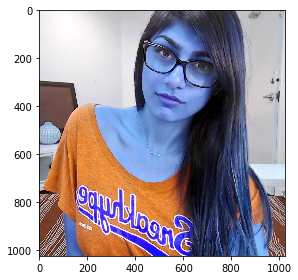

In [ ]:
img = cv2.imread("/content/mk.jpg")
img1 = cv2.imread("/content/th.jpg")
from skimage import io 
io.imshow(img)



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.parameter import Parameter
from torch.utils.data import Dataset,DataLoader
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import progressbar
import time
from tqdm import tqdm
!pip install pytorch-model-summary
from pytorch_model_summary import summary
import os
import copy

if torch.cuda.is_available():
  device = 'cuda:0'
else:
  device = 'cpu'

from torchvision import models

resnet_50 = models.resnet50(pretrained=True)
for param in resnet_50.parameters():
    param.requires_grad = False
#print(summary(resnet_50, torch.zeros((5, 3, 64, 64)), show_input=False))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
import os
os.chdir('/content/')
!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip
!ls
!unzip tiny-imagenet-200.zip
!rm -r tiny-imagenet-200/test
!mkdir tiny-imagenet-200/test

Streaming output truncated to the last 5000 lines.
  inflating: tiny-imagenet-200/val/images/val_3979.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3963.JPEG  
  inflating: tiny-imagenet-200/val/images/val_7199.JPEG  
  inflating: tiny-imagenet-200/val/images/val_2752.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9687.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9407.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3603.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3412.JPEG  
  inflating: tiny-imagenet-200/val/images/val_6982.JPEG  
  inflating: tiny-imagenet-200/val/images/val_8496.JPEG  
  inflating: tiny-imagenet-200/val/images/val_7332.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9241.JPEG  
  inflating: tiny-imagenet-200/val/images/val_4196.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5980.JPEG  
  inflating: tiny-imagenet-200/val/images/val_6697.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9969.JPEG  
  inflating: tiny-ima

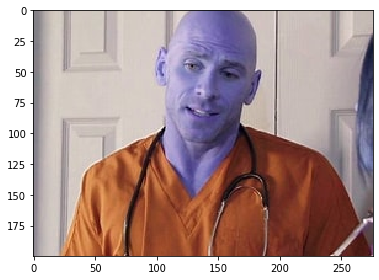

In [ ]:
io.imshow(img1)

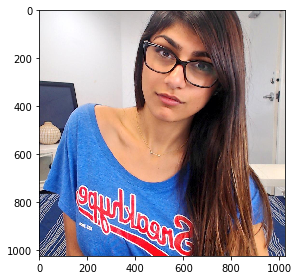

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
io.imshow(img)


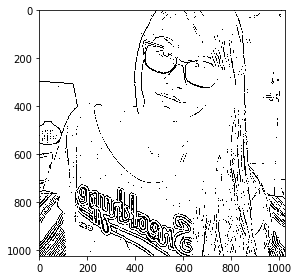

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)
edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
io.imshow(edges)

In [ ]:
import os,shutil
import numpy as np
path = '/content/tiny-imagenet-200/'
os.chdir(path)
# os.listdir(path+'train')
for name in os.listdir(path+'train'):
	if not(os.path.exists(path+'test/'+name)):
		os.mkdir(path+'test/'+name)

for name in os.listdir(path+'train'):
	sz = int(len(os.listdir(path+'train/'+name+'/images/'))/5)
	# l = np.random.choice(lst,sz).copy()
	# print(len(l),name)
	for i in range(sz):
		# file = i
		lst = os.listdir(path+'train/'+name+'/images/')
		file = np.random.choice(lst)
		shutil.move(path+'train/'+name+'/images/'+file,path+'test/'+name+'/'+file)

In [ ]:
color = cv2.bilateralFilter(img, 9, 250, 250)
cartoon = cv2.bitwise_and(color, color, mask=edges)

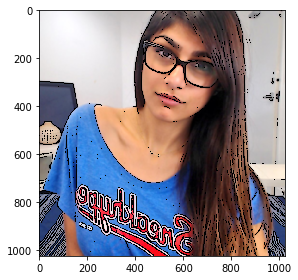

In [ ]:
io.imshow(cartoon)

In [ ]:
color = cv2.bilateralFilter(img1, 9, 250, 250)
cartoon1 = cv2.bitwise_and(color, color, mask=edges)

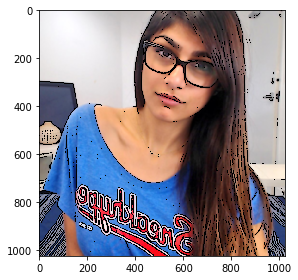

In [ ]:
io.imshow(cartoon1)